## Unsupervised Learning
#### by **Ivan Alducin**
<p><img src="https://cdn.gritglobal.io/uploads/too-broad-customer-segmentation.jpg" width="1000"/></p>

## Segmentacion de Clientes
<p>En esté capitulo nos vamos a enfocar en entender y trabajar un caso de uso para segmentación de clientes, pero antes de eso aquí una pequeña lista de más aplicaciones que se pueden trabajar con los datos recopliados de mis clientes

- Estadística Descriptiva
- Segmentación de Clientes
- Predicción de Abandono
- Valor del Cliente a traves del tiempo (CTLV)

La segmentación la vamos a hacer con base en una metodolgía llamada <b>RFM</b>

</p>

In [17]:
# Importa Pandas, Numpy, Seaborn y Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importa el archivo "Online Retail.csv"
import os
os.chdir("/Users/YChav/Desktop")

df = pd.read_csv('M30 Online Retail.csv',encoding = 'latin-1')
df.head()

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom


In [3]:
# Análisis Exploratorio
print("Información del DataFrame")
display(df.info())

print("Estadísticas descriptivas")
display(df.describe())

print("Valores faltantes por columna")
display(df.isnull().sum())

Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

Estadísticas descriptivas


,QUANTITY,UNIT_PRICE,CUSTOMER_ID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Valores faltantes por columna


INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64

## Recency
<p>Indicador que nos dice que tan reciente es la compra de un cliente</p>

In [5]:
# Obtener los clientes unicos
customer = df[['CUSTOMER_ID']].drop_duplicates()
customer

,CUSTOMER_ID
0,17850.0
9,13047.0
26,12583.0
46,13748.0
65,15100.0
...,...
536969,13436.0
537255,15520.0
538064,13298.0
538812,14569.0


In [23]:
# Obtener la última fecha de compra por cliente
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format='mixed')
max_purchase =  df.groupby('CUSTOMER_ID')['INVOICE_DATE'].max().reset_index()
max_purchase

,CUSTOMER_ID,INVOICE_DATE
0,12346.0,2020-01-18 10:17:00
1,12347.0,2020-10-31 12:25:00
2,12348.0,2020-09-25 13:13:00
3,12349.0,2020-11-21 09:51:00
4,12350.0,2020-02-02 16:01:00
...,...,...
4367,18280.0,2020-07-03 09:52:00
4368,18281.0,2020-12-06 10:53:00
4369,18282.0,2020-09-08 15:10:00
4370,18283.0,2020-11-30 12:59:00


In [25]:
# Vamos a calcular nuestra metrica de Recency, esto lo haremos restando los días de la última fecha de compra a cada observacón
max_purchase['RECENCY'] = (df['INVOICE_DATE'].max() - max_purchase['INVOICE_DATE']).dt.days
max_purchase

,CUSTOMER_ID,INVOICE_DATE,RECENCY
0,12346.0,2020-01-18 10:17:00,327
1,12347.0,2020-10-31 12:25:00,40
2,12348.0,2020-09-25 13:13:00,76
3,12349.0,2020-11-21 09:51:00,19
4,12350.0,2020-02-02 16:01:00,312
...,...,...,...
4367,18280.0,2020-07-03 09:52:00,160
4368,18281.0,2020-12-06 10:53:00,4
4369,18282.0,2020-09-08 15:10:00,93
4370,18283.0,2020-11-30 12:59:00,10


In [29]:
# Unir el DataFrame de clientes únicos con el que acabamos de crear de la última fecha de compra
customer = pd.merge(customer[["CUSTOMER_ID"]], max_purchase[["CUSTOMER_ID", "RECENCY"]], on = "CUSTOMER_ID")
customer

,CUSTOMER_ID,RECENCY
0,17850.0,69
1,13047.0,47
2,12583.0,0
3,13748.0,159
4,15100.0,70
...,...,...
4367,13436.0,120
4368,15520.0,120
4369,13298.0,120
4370,14569.0,120


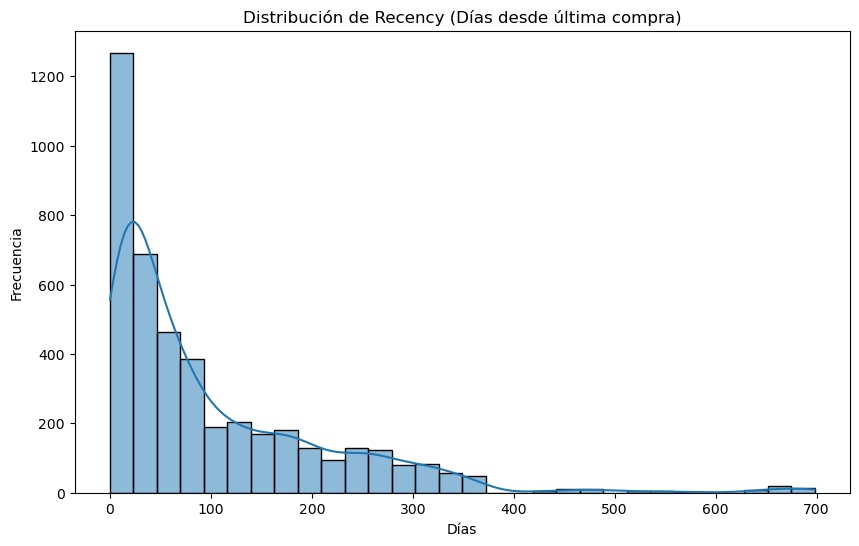

In [31]:
# Grafica un histograma de Recency
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x='RECENCY', bins=30, kde=True)
plt.title('Distribución de Recency (Días desde última compra)')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()

In [33]:
# Imprime la Estadística de Resumen para Recency
print("Estadísticas de Recency:")
print(customer['RECENCY'].describe())

Estadísticas de Recency:
count    4372.000000
mean      101.024016
std       114.118209
min         0.000000
25%        20.000000
50%        57.000000
75%       152.000000
max       698.000000
Name: RECENCY, dtype: float64


## Frequency
<p>Frecuencia con la que un cliente compra uno o más productos</p>

In [43]:
# Obtener el número de compras por cliente
frequency = df.groupby('CUSTOMER_ID')['INVOICE_NO'].nunique().reset_index()
frequency.columns = ['CUSTOMER_ID', 'FREQUENCY']
frequency

,CUSTOMER_ID,FREQUENCY
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [45]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer, frequency, on = 'CUSTOMER_ID')
customer

,CUSTOMER_ID,RECENCY,INVOICE_NO,FREQUENCY
0,17850.0,69,35,35
1,13047.0,47,18,18
2,12583.0,0,18,18
3,13748.0,159,5,5
4,15100.0,70,6,6
...,...,...,...,...
4367,13436.0,120,1,1
4368,15520.0,120,1,1
4369,13298.0,120,1,1
4370,14569.0,120,1,1


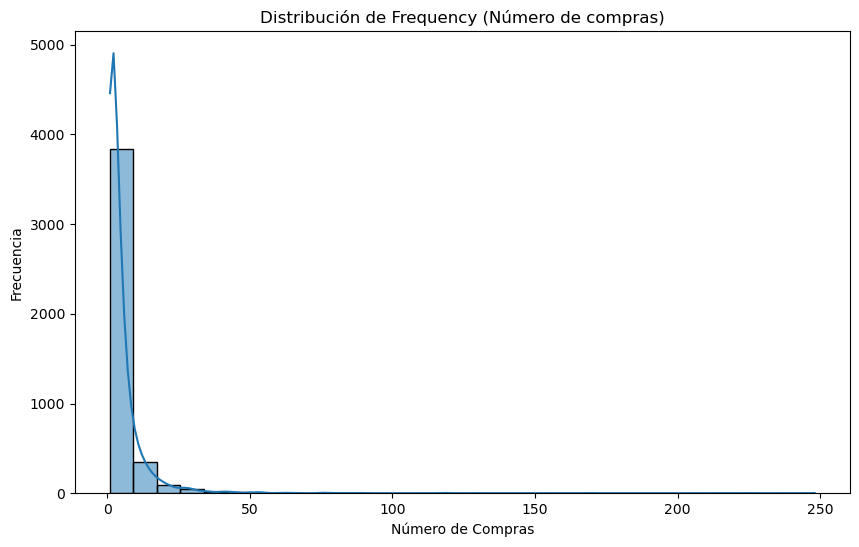

In [47]:
# Grafica un histograma de Frequency
plt.figure(figsize=(10, 6))
sns.histplot(data=customer, x = 'FREQUENCY', bins=30, kde=True)
plt.title('Distribución de Frequency (Número de compras)')
plt.xlabel('Número de Compras')
plt.ylabel('Frecuencia')
plt.show()

In [51]:
# Imprime la Estadística de Resumen para Frequency
print("Estadísticas de Frequency:")
print(customer['FREQUENCY'].describe())

Estadísticas de Frequency:
count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: FREQUENCY, dtype: float64


## Monetary
<p>Valor del monto total que ha gastado un cliente en la compra de mis productos</p>

In [53]:
# Calcular el monto total por cada compra
df['MONETARY'] = df["QUANTITY"] * df["UNIT_PRICE"]

# Obtener el valor monetario de compra por cliente
monetary = df.groupby("CUSTOMER_ID")["MONETARY"].sum().reset_index()
monetary.columns = ["CUSTOMER_ID", "MONETARY"]
monetary

,CUSTOMER_ID,MONETARY
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [57]:
# Unir el DataFrame que acabamos de crear con el de los clientes unicos
customer = pd.merge(customer, monetary, on = "CUSTOMER_ID", how = "left")
customer

,CUSTOMER_ID,RECENCY,INVOICE_NO,FREQUENCY,MONETARY
0,17850.0,69,35,35,5288.63
1,13047.0,47,18,18,3079.10
2,12583.0,0,18,18,7187.34
3,13748.0,159,5,5,948.25
4,15100.0,70,6,6,635.10
...,...,...,...,...,...
4367,13436.0,120,1,1,196.89
4368,15520.0,120,1,1,343.50
4369,13298.0,120,1,1,360.00
4370,14569.0,120,1,1,227.39


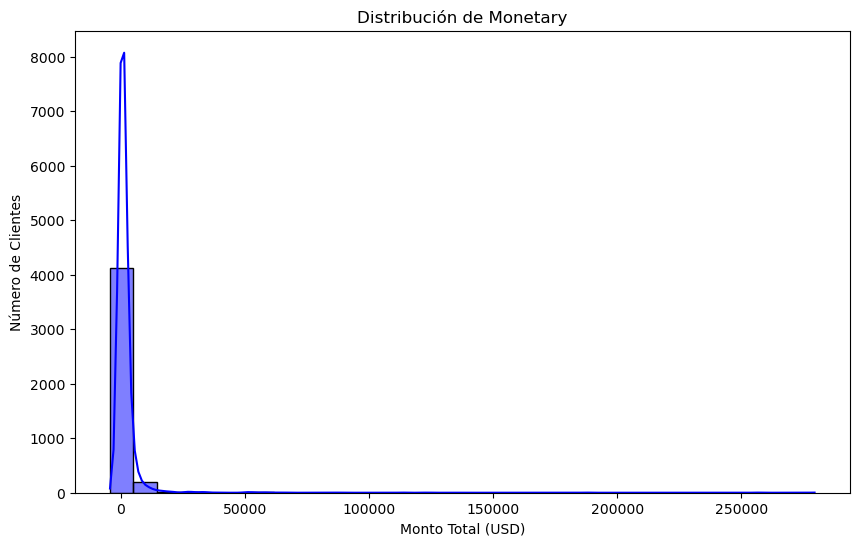

In [61]:
# Grafica un histograma de Monetary
plt.figure(figsize = (10, 6))
sns.histplot(data = customer, x = "MONETARY", bins=30, kde=True, color="blue")
plt.title("Distribución de Monetary")
plt.xlabel("Monto Total (USD)")
plt.ylabel("Número de Clientes")
plt.show()

In [63]:
# Imprime la Estadística de Resumen para Monetary
print("Estadísticas de Monetary:")
print(customer["MONETARY"].describe())

Estadísticas de Monetary:
count      4372.000000
mean       1898.459701
std        8219.345141
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: MONETARY, dtype: float64


## Algoritmo k-Means
<p>Ya creamos nuestros indicadores principales de la metodología RFM. es hora de hacer <i>Machine Learning</i>. Para ello utilizaremos un algoritmo no supervisado llamado <b>k-Means</b></p>
<p><img src="https://miro.medium.com/max/818/1*fG8u8nV7qR91wDyFDEEV-g.png" width="250"/></p>

In [65]:
# Funcion para ordenar los clusters
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

## Elbow Method
<p>¿Cual es mi número óptimo de clusters? Vamos a contruir una <i>gráfica de codo</i> para averiguarlo</p>

In [67]:
# Importa la librería de kMeans
from sklearn.cluster import KMeans

C:\Users\YChav\AppData\Local\Temp\ipykernel_6560\3177435491.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
C:\Users\YChav\AppData\Local\Temp\ipykernel_6560\3177435491.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency["clusters"] = kmeans.labels_
C:\Users\YChav\AppData\Local\Temp\ipykernel_6560\3177435491.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

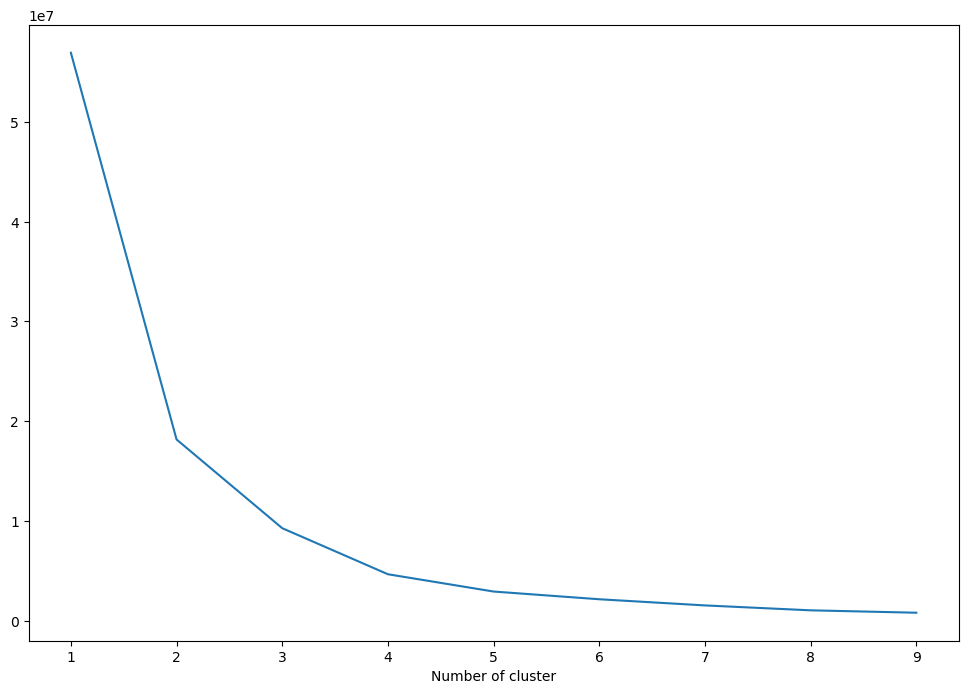

In [69]:
# Configuración inicial - Vamos a tomar como referencia el indicador de Recency
sse={}
recency = customer[["RECENCY"]]

for k in range(1, 10):
    # Instancia el algoritmo de k-means iterando sobre k
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    
    # Entrena el algoritmo
    kmeans.fit(recency)
    
    # Adjunta las etiquetas
    recency["clusters"] = kmeans.labels_
    
    # Adunta la inercia o variación al arreglo sse
    sse[k] = kmeans.inertia_
    
# Grafico de codo (Elbow)
plt.figure(figsize=(12,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [77]:
# Instanciar el algoritmo con 4 clusters para Recency 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer[["RECENCY"]])

# Obtener las predicciones
customer['RECENCY_CLUSTER'] = kmeans.predict(customer[["RECENCY"]])

# Ordenar los clusters
customer = order_cluster('RECENCY_CLUSTER', 'RECENCY', customer, False)

# Estadística Descriptiva del cluster creado
customer.groupby("RECENCY_CLUSTER")["RECENCY"].describe()

,count,mean,std,min,25%,50%,75%,max
RECENCY_CLUSTER,,,,,,,,
0,76.0,589.934211,94.109912,455.0,486.0,639.0,667.0,698.0
1,614.0,279.363192,44.867978,212.0,243.0,270.5,313.5,425.0
2,956.0,143.399582,35.224120,88.0,114.0,142.0,174.0,211.0
3,2726.0,32.363536,24.061944,0.0,12.0,25.0,51.0,87.0


In [79]:
# Instanciar el algoritmo con 4 clusters para Frequency 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer[["FREQUENCY"]])

# Obtener las predicciones
customer['FREQUENCY_CLUSTER'] = kmeans.predict(customer[["FREQUENCY"]])

# Ordenar los clusters
customer = order_cluster('FREQUENCY_CLUSTER', 'FREQUENCY', customer, True)

# Estadística Descriptiva de los clusters
customer.groupby("FREQUENCY_CLUSTER")["FREQUENCY"].describe()

,count,mean,std,min,25%,50%,75%,max
FREQUENCY_CLUSTER,,,,,,,,
0,3481.0,2.453605,1.546479,1.0,1.0,2.0,3.00,6.0
1,787.0,11.287166,4.275961,7.0,8.0,10.0,14.00,24.0
2,98.0,38.377551,14.750513,25.0,28.0,32.5,43.00,89.0
3,6.0,167.500000,56.807570,118.0,120.5,148.5,210.25,248.0


In [83]:
# Instanciar el algoritmo con 4 clusters para Monetary 
kmeans = KMeans(n_clusters = 4, random_state = 42, n_init = 10)

# Entrenar el algoritmo
kmeans.fit(customer[["MONETARY"]])

# Obtener las predicciones
customer['MONETARY_CLUSTER'] = kmeans.predict(customer[["MONETARY"]])

# Ordenar los clusters ¿Como tienes que ordenar el cluster?
customer = order_cluster("MONETARY_CLUSTER", "MONETARY", customer, False)

# Estadística Descriptiva de los clusters
customer.groupby("MONETARY_CLUSTER")["MONETARY"].describe()

,count,mean,std,min,25%,50%,75%,max
MONETARY_CLUSTER,,,,,,,,
0,3.0,241136.560000,47874.073443,187482.17,221960.330,256438.490,267963.7550,279489.02
1,15.0,71423.516000,28632.631870,50415.49,52287.280,57385.880,77008.7300,132572.62
2,102.0,15390.295980,7557.269118,8393.22,10192.235,12395.080,17460.8075,40340.78
3,4252.0,1160.746285,1403.441736,-4287.63,286.565,623.575,1476.0700,8257.04


## Score de Segmentación
<p>El algoritmo de k-means nos da una segmentación generalizada, pero podemos personalizarla aún más creando una métrica que asigne una calificación al valor del cluster. Esto es lo que vamos a hacer!!</p>

In [89]:
# Vamos a crear nuestro score sumando el valor de cada uno de los clusters
customer['SCORE'] = customer["RECENCY_CLUSTER"] + customer["FREQUENCY_CLUSTER"] + customer["MONETARY_CLUSTER"]

# Obtener el promedio para cada una de las métricas de las calificaciones creadas (Score)
print("Promedio del Score: ")
print(customer["SCORE"].mean())

Promedio del Score: 
5.645013723696249


In [95]:
# Crea una funcion que asigne lo siguiente: 
# Si score <= 1 entonces 'Low-Value', si score >1 y <=4 entonces 'Average', si score >4 y <=6 entonces 'Potential', por último si score >6 entonces 'High-Value'
def segment(score):
    if score <= 1:
        return "Low-Value"
    elif 1 < score <= 4:
        return "Average"
    elif 4 < score <= 6: 
        return "Potential"
    else: 
        return "High-Value"

# Crear una columna aplicando esta función al campo 'SCORE'
customer['SEGMENT'] = customer['SCORE'].apply(segment)

In [97]:
# Vamos a dar un vistazo a la tabla final
customer.head()

,CUSTOMER_ID,RECENCY,INVOICE_NO,FREQUENCY,MONETARY,RECENCY_CLUSTER,FREQUENCY_CLUSTER,MONETARY_CLUSTER,SCORE,SEGMENT
0,17850.0,69,35,35,5288.63,3,2,3,8,High-Value
1,13047.0,47,18,18,3079.10,3,1,3,7,High-Value
2,12583.0,0,18,18,7187.34,3,1,3,7,High-Value
3,13748.0,159,5,5,948.25,2,0,3,5,Potential
4,15100.0,70,6,6,635.10,3,0,3,6,Potential


In [103]:
# Imprime la proporción o el total de clientes por segmento
segment_proportion = customer["SEGMENT"].value_counts(normalize = True) * 100
print("Proporción de cientes por segmento (%): ")
print(segment_proportion)

Proporción de cientes por segmento (%): 
SEGMENT
Potential     66.399817
High-Value    17.840805
Average       15.759378
Name: proportion, dtype: float64


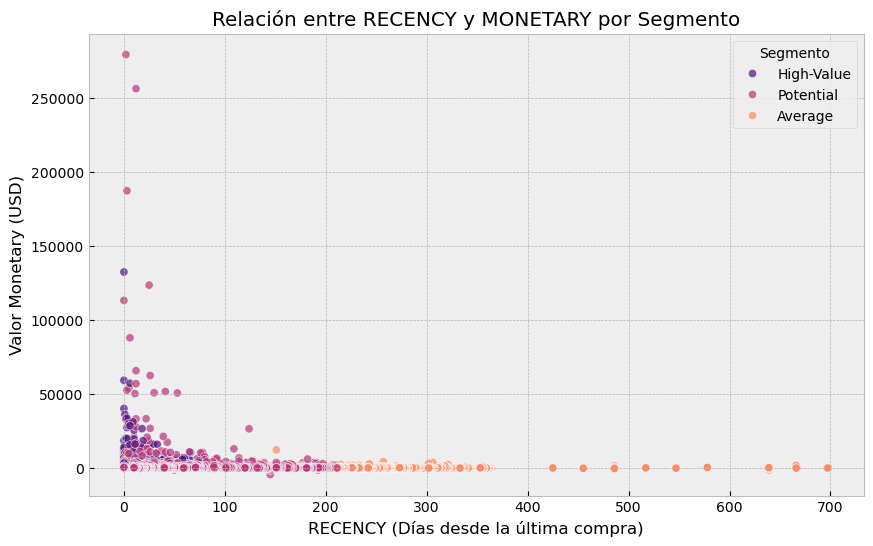

In [109]:
# Define un estilo 'bmh'
plt.style.use("bmh")

# Filtra los valores para RECENCY < 4000
customer_filtered = customer[customer["RECENCY"] < 4000]

# Crea un grafico de dispersion de 'MONETARY' VS 'RECENCY' por Segmento
plt.figure(figsize = (10, 6))
sns.scatterplot(data = customer_filtered,
               x = "RECENCY",
               y = "MONETARY",
               hue = "SEGMENT",
               palette = "magma",
               alpha = 0.7)

plt.title("Relación entre RECENCY y MONETARY por Segmento")
plt.xlabel("RECENCY (Días desde la última compra)")
plt.ylabel("Valor Monetary (USD)")
plt.legend(title = "Segmento")
plt.show()




# Resumén




Los clientes se divieron en 3 segmentos:

Proporción de cientes por segmento (%): 
SEGMENT
Potential     66.399817
High-Value    17.840805
Average       15.759378



La relación entre métricas serían las siguientes.

* Recency vs Monetary. Los clientes más recientes (con menor Recency) tienden a tener un mayor gasto (high-value), mientas que los inactivos(alto Recency) muestran menor gasto.

* Frequency vs Monetary. una alta frecuencia de compra está correlacionada con un mayor gasto total. Lo cual se lee como clientes leales.

* Como recomendaciones podría aconsejar generar programas de beneficios VIP para crear fidelización para el segmento High-Value. Para el Potetial y Average recomendaría campañas cross-sellig basadas en su historial o incentivos por comprar recurrentes. Quizá también correos personalizados con ofertas limitadas

En conclusión la segmentación RFM junto con K-Means proporciona una herramienta para categorizar clientes y pensar en estrategias priorizadas. Los datos nos pueden orientar a pensar que debemos enfocarnos en retener clientes de alto valor y generar una reactivación a los inactivos.